(image-segmentation:relabel-sequential)=
# Sequential object (re-)labeling

As mentioned above, depending on the use-case it might be important to label objects in an image subsequently. It could for example be that a post-processing algorithm for label images crashes in case we pass a label image with missing labels. Hence, we should know how to relabel an image sequentially.

In [1]:
import numpy as np
from skimage.io import imread
from skimage.segmentation import relabel_sequential
import pyclesperanto_prototype as cle

Our starting point is a label image with labels 1-8, where some labels are not present:

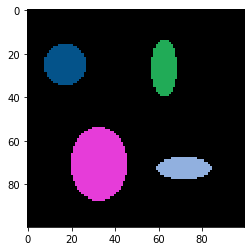

In [2]:
label_image = imread("../../data/label_map_with_index_gaps.tif")
cle.imshow(label_image, labels=True)

When measuring the maximum intensity in the image, we can see that this label image containing 4 labels is obviously not sequentially labeled.

In [3]:
np.max(label_image)

8

We can use the `unique` function to figure out which labels are present:

In [4]:
np.unique(label_image)

array([0, 1, 2, 4, 8], dtype=uint8)

## Sequential labeling
We can now relabel this image and remove these gaps using [scikit-image's `relabel_sequential()` function](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.relabel_sequential). We're entering the `_` as additional return variables as we're not interested in them. This is necessary because the `relabel_sequential` function returns three things, but we only need the first.

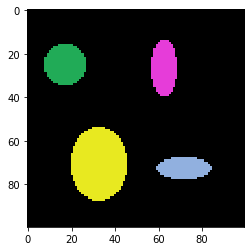

In [5]:
relabeled, _, _ = relabel_sequential(label_image)

cle.imshow(relabeled, labels=True)

Afterwards, the unique labels should be sequential:

In [6]:
np.unique(relabeled)

array([0, 1, 2, 3, 4], dtype=uint8)

Also pyclesperanto has a function for relabeling label images sequentially. The result is supposed identical to the result in scikit-image. It just doesn't return the additional values.

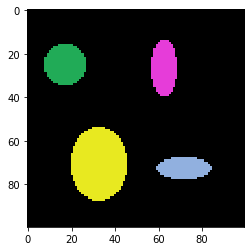

In [7]:
relabeled1 = cle.relabel_sequential(label_image)

cle.imshow(relabeled1, labels=True)

## Reverting sequential labeling
In some cases we apply an operation to a label image that returns a new label image with less labels that are sequentially labeled but the label-identity is lost. This happens for example when excluding labels from the label image that are too small.

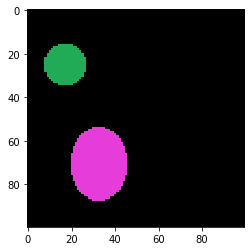

In [8]:
large_labels = cle.exclude_small_labels(relabeled, maximum_size=260)

cle.imshow(large_labels, labels=True, max_display_intensity=4)

In [9]:
np.unique(large_labels)

array([0, 1, 2], dtype=uint32)

To restore the original label identities, we need to multiply a binary image representing the remaining labels with the original label image.

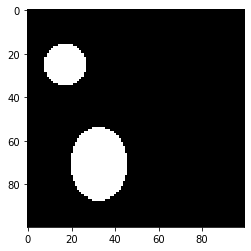

In [10]:
binary_remaining_labels = large_labels > 0

cle.imshow(binary_remaining_labels)

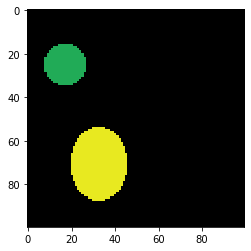

In [11]:
large_labels_with_original_identity = binary_remaining_labels * relabeled

cle.imshow(large_labels_with_original_identity, labels=True, max_display_intensity=4)

In [12]:
np.unique(large_labels_with_original_identity)

array([0., 1., 3.], dtype=float32)

We can now conclude that labels with identities 2 and 4 were too small and thus, excluded.